In [11]:
# CELL 1 — install libraries
!pip install -q ultralytics supervision roboflow opencv-python tqdm
#ultralytics-official yolo v8 library has functions for data set habdling validatoion ,need to fine tune and use yolov8
# supervison is a helper libray making it easier to visualize detections like boundaries boxes tracking boxes etc
#roboflow for accessing datsets and workflows fromroboflow downloaded datset directly into colab automates export,preprocessing and versioning of datsets
#open cv is core cv library read writes images/draw bounding boxes on images
#tqdm for progress bar uitility shows progress for dataset downloads



In [12]:
api_key="5fJFmlGRxBUEfvi7QyN8"
with open(".env", "w") as f:
    f.write(f"ROBOFLOW_API_KEY={api_key}\n")
!cat .env

ROBOFLOW_API_KEY=5fJFmlGRxBUEfvi7QyN8


In [13]:
!pip install -q python-dotenv
#to load the api form env

In [14]:
import os
from dotenv import load_dotenv

# Loading variables from .env file
load_dotenv(".env")

# Geting the key
ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY")
print("Loaded API Key:", ROBOFLOW_API_KEY[:10] + "..." if ROBOFLOW_API_KEY else "Not found")


Loaded API Key: 5fJFmlGRxB...


In [15]:
from roboflow import Roboflow

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
print("Connected to Roboflow!")


Connected to Roboflow!


In [16]:
from roboflow import Roboflow

#  API key
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

# Accessing my project and dataset version
workspace_name = "fatimas-workspace"
project_name = "traffic-cones-y4m5x-7x7d8"
version_number = 1

# Downloading the dataset in YOLOv8 format
project = rf.workspace(workspace_name).project(project_name)
dataset = project.version(version_number).download("yolov8")

# Verifying the dataset location
print("Dataset downloaded at:", dataset.location)


loading Roboflow workspace...
loading Roboflow project...
Dataset downloaded at: /content/traffic-cones-1


Fine Tuning our YOLO Model

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
project_dir = "/content/drive/MyDrive/yolo_runs"


In [19]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="/content/traffic-cones-1/data.yaml",  # dataset
    epochs=10,
    imgsz=640,
    batch=16,
    project=project_dir,     # save inside Google Drive
    name="traffic_cone_exp1" # experiment folder name
)


Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/traffic-cones-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=traffic_cone_exp1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

train: Scanning /content/traffic-cones-1/train/labels.cache... 1017 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1017/1017 [00:00<?, ?it/s]

train: /content/traffic-cones-1/train/images/4_z8126b7d060d92d74599e0618_f105bec8d654623bd_d20170228_m032421_c001_v0001038_t0052_png.rf.2b22304d0c05302ed129773c6a12ed98.jpg: 1 duplicate labels removed
train: /content/traffic-cones-1/train/images/4_z8126b7d060d92d74599e0618_f105bec8d654623bd_d20170228_m032421_c001_v0001038_t0052_png.rf.686c50d4f384a5c1c3483dce5bea3f40.jpg: 1 duplicate labels removed
train: /content/traffic-cones-1/train/images/4_z8126b7d060d92d74599e0618_f105bec8d654623bd_d20170228_m032421_c001_v0001038_t0052_png.rf.fdda819e986effc20034e74ee12aa8c2.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 537.6±359.0 MB/s, size: 49.6 KB)


val: Scanning /content/traffic-cones-1/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

val: /content/traffic-cones-1/valid/images/4_z8126b7d060d92d74599e0618_f105bec8d65461b60_d20170228_m031732_c001_v0001038_t0052_png.rf.630b76b6f5213060ec02f1424cc68148.jpg: 2 duplicate labels removed


Plotting labels to /content/drive/MyDrive/yolo_runs/traffic_cone_exp1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_runs/traffic_cone_exp1
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.11G      1.467      3.134      1.516         16        640: 100%|██████████| 64/64 [00:23<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         40         62      0.053      0.941      0.393      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.58G       1.34      2.173      1.373         15        640: 100%|██████████| 64/64 [00:20<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         40         62      0.503      0.888      0.545      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.58G      1.295      1.939      1.348         16        640: 100%|██████████| 64/64 [00:21<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         40         62      0.518      0.816      0.589      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.58G      1.308      1.735      1.317         13        640: 100%|██████████| 64/64 [00:19<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         40         62      0.473      0.822      0.499      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.58G      1.245        1.6      1.288         15        640: 100%|██████████| 64/64 [00:18<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40         62      0.543      0.697      0.633       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.58G      1.189      1.481      1.256         13        640: 100%|██████████| 64/64 [00:22<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         40         62      0.525      0.837      0.693      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.59G      1.118      1.347      1.211         13        640: 100%|██████████| 64/64 [00:20<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         40         62      0.609      0.748      0.646      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.59G      1.096      1.276      1.194         15        640: 100%|██████████| 64/64 [00:20<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         40         62      0.546       0.89      0.757      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.59G       1.04      1.171       1.16         18        640: 100%|██████████| 64/64 [00:19<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         40         62      0.468      0.905      0.582      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.59G     0.9828      1.106      1.114         13        640: 100%|██████████| 64/64 [00:19<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         40         62      0.494      0.959      0.643      0.422



10 epochs completed in 0.061 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_runs/traffic_cone_exp1/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/yolo_runs/traffic_cone_exp1/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/yolo_runs/traffic_cone_exp1/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


                   all         40         62      0.546      0.889      0.757      0.474
                  Cone         20         28      0.643      0.836      0.785       0.53
                  cone         20         34      0.449      0.941      0.728      0.418
Speed: 0.3ms preprocess, 3.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_runs/traffic_cone_exp1


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a53de8bfa90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804


image 1/1 /content/traffic-cones-1/valid/images/107_jpg.rf.5ed5a7874426e363369fc2aa1c63f242.jpg: 640x640 1 cone, 7.4ms
Speed: 1.9ms preprocess, 7.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


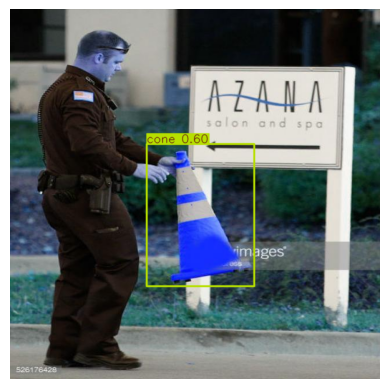

In [20]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
results=model("/content/traffic-cones-1/valid/images/107_jpg.rf.5ed5a7874426e363369fc2aa1c63f242.jpg")

import cv2
from matplotlib import pyplot as plt


# Plot the predictions
plt.imshow(results[0].plot())
plt.axis('off')
plt.show()
